# Deep learning from scratch: homework 2

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

In [52]:
import autograd.numpy as np
from autograd import grad

import matplotlib.pyplot as plt
%matplotlib inline

#### <span style="color:#a50e3e;">Exercise 1. </span>   Perform two-class classification on a toy dataset

Code up the two-class logistic regression / softmax cost function, using gradient descent to minimize.  You should use the two class toy dataset in the file called *3d_classification_data_v2.csv*.

Create a plot with two panels that shows the number of misclassifications at each gradient descent step (in the left panel), and one that compares the cost function at each gradient descent step (in the right panel).  You won't get perfect separation - but you should be able to separate most of the points.

In [53]:
data_1 = np.loadtxt("3d_classification_data_v2.csv",delimiter = ',')

In [54]:
x_1 = data_1[:,:-1]
X_1 = np.ones((x_1.shape[0],x_1.shape[1]+1)); # Create a matrix of ones for all relevant size
X_1[:,1:] = x_1;                                # Reset weights for all but 0th position    
y_1 = data_1[:,-1]
y_1.shape = (100,1)
w_1 = np.random.randn(np.shape(x_1)[1]+1,1)

In [55]:
def softmax_cost(w,X,y):
    """Compute softmax values for each sets of scores in x."""
    return np.sum(np.log(1+np.exp(-y*np.dot(X,w))))
    

In [56]:
def accuracy(w,X,y):
    "Compute accuracy for a given weight"
    return 1 - (np.sum(np.maximum(0,np.sign(-y*np.dot(X,w)))))/y.shape[0]
    

In [57]:
def missclass(acc,y):
    "Compute number of missclass for a given accuracy and output"
    examples = y.shape[0]
    return [(1-acc)*examples for acc in acc]
    

In [58]:
#softmax_cost(w_1,X_1,y_1)
#accuracy(w_1,X_1,y_1)

In [59]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,acc,alpha,max_its,w,X,y):
    # compute the gradient of our input function - note this is a function too!
    
    gradient = grad(g)
    acur_history = []
    cost_history = []

    # run the gradient descent loop
    best_w = w                 #  best weight
    best_acur = acc(w,X,y)     #  best acc
    best_eval = g(w,X,y)       #  lowest evaluation yet
    
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w,X,y)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # return only the weight providing the lowest evaluation
        test_acur = acc(w,X,y)
        test_eval = g(w,X,y)
        
        # append to lists
        acur_history.append(test_acur)
        cost_history.append(test_eval)
        
        # if best, update (currently not being used)
        if test_eval < best_eval:
            best_acur = test_acur
            best_eval = test_eval
            best_w = w
            
    return acur_history, cost_history

In [60]:
acur_history_1, cost_history_1 = gradient_descent(softmax_cost,accuracy,10**-2,5000,w_1,X_1,y_1)
mis_class_1 = missclass(acur_history_1,y_1)

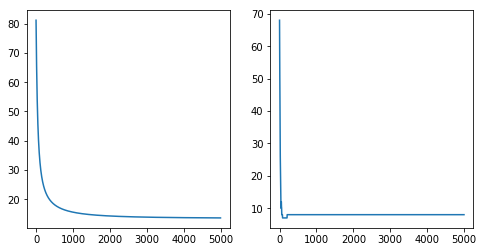

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].plot(cost_history_1)
ax[1].plot(mis_class_1)
plt.show()

#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

Use the softmax cost function to classify healthy from cancerous tissue using the dataset located in breast_cancer_dataset.csv (included in this homework folder).  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_dataset.csv, the last column are the associated labels).  Fit using gradient descent using a maximum of 5,000 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples.

**Note:** Python is a great prototyping language but [it is slow](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/), particular when evaluating explicit for loops.  If you are having speed issues try re-writing the softmax cost function using as few explicit for-loops as possible (you can indeed write the entire summation in a single line of Python code, for-loop free).

In [62]:
data_2 = np.loadtxt("breast_cancer_data.csv",delimiter = ',')

In [63]:
x_2 = data_2[:,:-1]
X_2 = np.ones((x_2.shape[0],x_2.shape[1]+1)); # Create a matrix of ones for all relevant size
X_2[:,1:] = x_2;                                # Reset weights for all but 0th position    
y_2 = data_2[:,-1]
y_2.shape = (699,1)
w_2 = np.random.randn(np.shape(x_2)[1]+1,1)

In [64]:
acur_history_2, cost_history_2 = gradient_descent(softmax_cost,accuracy,0.0002,5000,w_2,X_2,y_2)
mis_class_2 = missclass(acur_history_2,y_2)

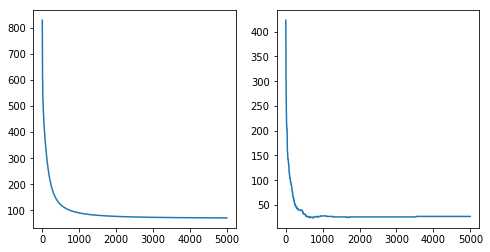

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].plot(cost_history_2)
ax[1].plot(mis_class_2)
plt.show()

In [66]:
mis_class_2[-1]

27.000000000000004

#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

Using the toy $C = 3$ class dataset located in *3class_data.csv* - code up One-Versus-All classification, using this toy dataset to test out your code.  You should be able to learn a model that perfectly separates this data - as shown in class.  You may use your softmax cost / gradient descent code here for each of the two-class subproblems! 

In [67]:
data_3 = np.loadtxt("3class_data.csv",delimiter = ',')

In [68]:
y_3 = data_3[:,-1]
y_3.shape = (30,1)
y_3_1 = np.where(y_3 ==1,1,-1)
y_3_2 = np.where(y_3 ==2,1,-1)
y_3_3 = np.where(y_3 ==3,1,-1)

In [69]:
x_3 = data_3[:,:-1]
X_3 = np.ones((x_3.shape[0],x_3.shape[1]+1)); # Create a matrix of ones for all relevant size
X_3[:,1:] = x_3;                              # Reset weights for all but 0th position

In [70]:
w_3_1 = np.random.randn(np.shape(x_3)[1]+1,1)
w_3_2 = np.random.randn(np.shape(x_3)[1]+1,1)
w_3_3 = np.random.randn(np.shape(x_3)[1]+1,1)

In [71]:
acur_history_3_1, cost_history_3_1 = gradient_descent(softmax_cost,accuracy,0.002,5000,w_3_1,X_3,y_3_1)
mis_class_3_1 = missclass(acur_history_3_1,y_3_1)

acur_history_3_2, cost_history_3_2 = gradient_descent(softmax_cost,accuracy,0.002,5000,w_3_2,X_3,y_3_2)
mis_class_3_2 = missclass(acur_history_3_2,y_3_2)

acur_history_3_3, cost_history_3_3 = gradient_descent(softmax_cost,accuracy,0.002,5000,w_3_3,X_3,y_3_3)
mis_class_3_3 = missclass(acur_history_3_3,y_3_3)




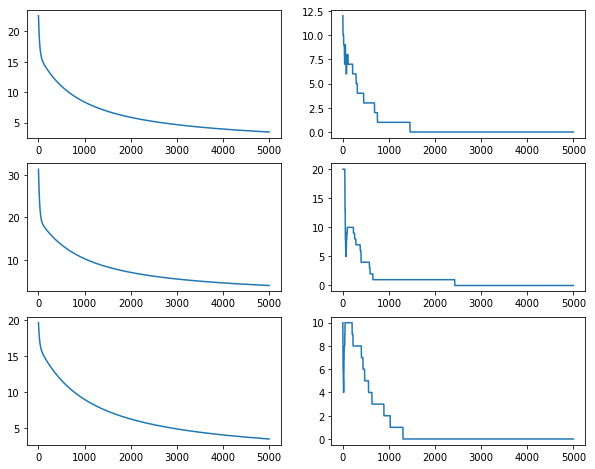

In [72]:
fig, ax = plt.subplots(3, 2, figsize=(10,8))
ax[0][0].plot(cost_history_3_1)
ax[0][1].plot(mis_class_3_1)
ax[1][0].plot(cost_history_3_2)
ax[1][1].plot(mis_class_3_2)
ax[2][0].plot(cost_history_3_3)
ax[2][1].plot(mis_class_3_3)



plt.show()

#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

Propose a nonlinear feature transformation and integrate it into your two-class classification scheme in order to adequately classify the dataset shown below - located in the file *bricks.csv'.  With the right transformation you should be able to classify this quite well.

<p>
  <img src= 'brick_pick.png' width="40%" height="40%" alt=""/>
</p>

In [73]:
data_4 = np.loadtxt("bricks.csv",delimiter = ',')

In [74]:
y_4 = data_4[:,-1]
y_4.shape = (100,1)

In [75]:
x_4 = data_4[:,:-1]

In [86]:
x_4_extend_1 = np.power(x_4,2)
x_4_extend_2 = np.power(x_4,3)
x_4_extend_3 = np.power(x_4,4)
x_4_extend_4 = np.power(x_4,5)
x_4_new = np.hstack((x_4,x_4_extend_1,x_4_extend_2,x_4_extend_3,x_4_extend_4))

In [90]:
X_4 = np.ones((x_4_new.shape[0],x_4_new.shape[1]+1)); # Create a matrix of ones for all relevant size
X_4[:,1:] = x_4_new;                                  # Reset weights for all but 0th position 

w_4 = np.random.randn(np.shape(x_4_new)[1]+1,1)

In [93]:
acur_history_4, cost_history_4 = gradient_descent(softmax_cost,accuracy,0.003,5000,w_4,X_4,y_4)
mis_class_4 = missclass(acur_history_4,y_4)

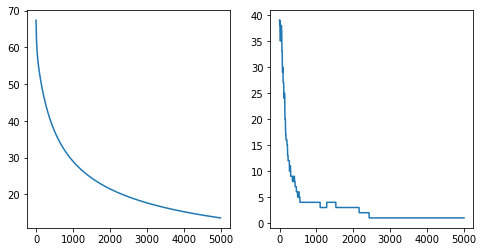

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].plot(cost_history_4)
ax[1].plot(mis_class_4)
plt.show()